Fitting Parameters: [-5.50596394e+01  1.37647901e+02 -9.87947884e+01  1.05366117e+01
  5.66512631e+00 -1.80375037e-03]


(array([-5.50596394e+01,  1.37647901e+02, -9.87947884e+01,  1.05366117e+01,
         5.66512631e+00, -1.80375037e-03]),
 1)

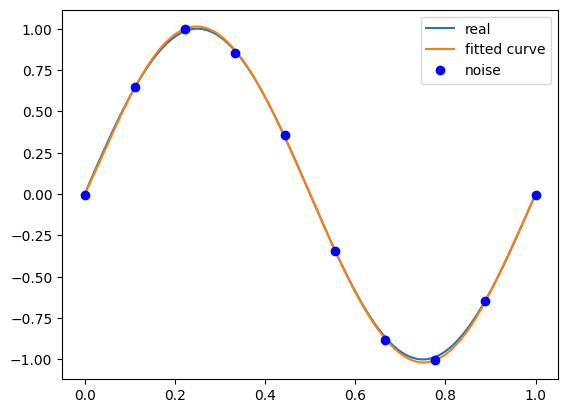

In [27]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

def real_func (x):
    return np.sin(2 * np.pi * x)

def fit_func (p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func (p, x, y):
    ret = fit_func(p, x) - y
    return ret

x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
y_ = real_func(x)
y = [np.random.normal(0, 0.01) + y1 for y1 in y_]

def fitting (M):
    p_init = np.random.rand(M + 1)
    p_lsq = leastsq(residuals_func, p_init, args = (x, y))
    print("Fitting Parameters:", p_lsq[0])

    plt.plot(x_points, real_func(x_points), label = "real")
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label = "fitted curve")
    plt.plot(x, y, "bo", label = "noise")
    plt.legend()
    return p_lsq

fitting(5)